In [296]:
#Load data
import pandas as pd
data = pd.read_csv("MusicInstruments.csv",encoding = "ISO-8859-1")


In [298]:
print(data.shape)
data.head(3)

(6124, 7)


,Instrument_ID,Asin,Title,Url,Brand,Description,ReviewText
0,1,1384719342,niceEshop Studio Microphone Mic Wind Screen Po...,http://ecx.images-amazon.com/images/I/510D2cVp...,niceEshop,New generic Studio Microphone Mic Wind Screen ...,"It's awesome, love it. The mic is very nice m..."
1,2,14072149,Double Concerto in D Minor By Johann Sebastian...,http://ecx.images-amazon.com/images/I/41m6ygCq...,Bach,Composer: J.S. Bach.Peters Edition.For two vio...,If you are a serious violin student on a budge...
2,3,1423494148,Twilight: Music from the motion picture - Pian...,http://ecx.images-amazon.com/images/I/41wK2T8Q...,NaN,Brand New book of sheet music from Summit Ente...,I found out that I can 'purchase' the music (p...


In [ ]:
#inspect Data for specific instrument by ID
def inspectInstrumentByID(Instrument_ID):
    
    Instrument = data.query('Instrument_ID==@Instrument_ID')
    print(Instrument.Title)
    Instrument_image = Instrument.Url.values[0]
    image = io.imread(Instrument_image)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    print("Description:")
    print(Instrument.Description.values)
    print("Revies:")
    print("There are {} reviews".format(len(Instrument.ReviewText)))
    print(Instrument.ReviewText.values)
    

9    Child Student Size 1/2 Good Sound Stradivari 1...
Name: Title, dtype: object


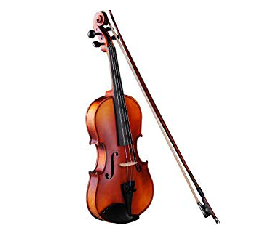

Description:
["What Makes Our Violin Different?Perfect Sound Production:Adopt excellent sound production, copy of Antonio Stradivari Cremonensis Faciebat Anno 1721, for best melodious treble and rich bass.Vif selects the best sound production system, not like other sellers who merely copy the appearance of antonio stradivary works.High Quality Materials:Vivid growth ring lines fully show the A grade 4 years Spruce top and 4 years Maple back. Nothing but superior wood optimizes sound production.Gorgeous Technique:Standard ebony Fingerboard for the best effective string length and perfect finger position.Bridge with accurate radian for precisely playing each string.Delicate Scroll shows maker's wonderful sculpture technique.More than 12 times Brushing lacquer for elegant appearance.Features:*Brand: Vif* 100% hand made 1/2 advanced violin* Top: well air-dried 4 years Spruce* Back: 2 pieces well air-dried 4 years Maple* Rib: well air-dried 4 years Maple* Fingerboard: solid ebony* Tailpiece

'\n    Check for Instrument Details\n    '

In [300]:
from skimage import io
import matplotlib.pyplot as plt
inspectInstrumentByID(Instrument_ID=10)
'''
    Check for Instrument Details
    '''

In [301]:
'''
Preparing data for models
    '''

data['Description']=data['Description'].str.lower()
data['ReviewText']=data['ReviewText'].str.lower()
data['Brand']=data['Brand'].str.lower()





In [302]:
import pickle
data.to_pickle("MusicData.pkl")

In [303]:
data = pd.read_pickle("MusicData.pkl")
data.head(3)

,Instrument_ID,Asin,Title,Url,Brand,Description,ReviewText
0,1,1384719342,niceEshop Studio Microphone Mic Wind Screen Po...,http://ecx.images-amazon.com/images/I/510D2cVp...,niceeshop,new generic studio microphone mic wind screen ...,"it's awesome, love it. the mic is very nice m..."
1,2,14072149,Double Concerto in D Minor By Johann Sebastian...,http://ecx.images-amazon.com/images/I/41m6ygCq...,bach,composer: j.s. bach.peters edition.for two vio...,if you are a serious violin student on a budge...
2,3,1423494148,Twilight: Music from the motion picture - Pian...,http://ecx.images-amazon.com/images/I/41wK2T8Q...,NaN,brand new book of sheet music from summit ente...,i found out that i can 'purchase' the music (p...


In [304]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
#data['Description'] = data['Description'].str.split()
data['Description'] = data.Description.apply(func=stopWordsRemoval)
data['ReviewText'] = data.ReviewText.apply(func=stopWordsRemoval)

In [305]:
#stopWordsRemoval

def stopWordsRemoval(text):
    text = text.split()
    stops = stopwords.words("english")
    text = [item for item in text if item not in stop]
    text = " ".join(text)
    return text

In [306]:
#tokenization
def tokenization(text):   #removing punctuations
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

In [307]:
from nltk.tokenize import RegexpTokenizer
data['Description'] = data.Description.apply(func=tokenization)
data['ReviewText'] = data.ReviewText.apply(func=tokenization)

In [308]:
#Stemming
from nltk.stem import SnowballStemmer
#print(" ".join(SnowballStemmer.languages)) # See which languages are supported
def stemming(text):
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    return text

In [309]:
data['Description'] = data.Description.apply(func=stemming)
data['ReviewText'] = data.ReviewText.apply(func=stemming)

In [310]:
data.head(3)

,Instrument_ID,Asin,Title,Url,Brand,Description,ReviewText
0,1,1384719342,niceEshop Studio Microphone Mic Wind Screen Po...,http://ecx.images-amazon.com/images/I/510D2cVp...,niceeshop,new generic studio microphon mic wind screen p...,awesom love it mic nice make record much fun l...
1,2,14072149,Double Concerto in D Minor By Johann Sebastian...,http://ecx.images-amazon.com/images/I/41m6ygCq...,bach,compos j s bach peter edit for two violin piano,serious violin student budget edit all piano a...
2,3,1423494148,Twilight: Music from the motion picture - Pian...,http://ecx.images-amazon.com/images/I/41wK2T8Q...,NaN,brand new book sheet music summit entertain hi...,found purchas music piano vocal book movi twil...


In [311]:
data.to_pickle("PreprocessedData.pkl")

# Document Preparation

In [312]:
data['Document'] = data['Description'] + ' ' + data['ReviewText']+ ' ' + data['Brand']

In [313]:
data['Document'].head(1)
data['Document'].to_csv("Document.csv")

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [314]:
#Fitting  TFIDF 
#Peparing Document-term matrix and Learn vocabulary
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word', 
                     min_df=10,
                     ngram_range=(1,4),
                     #max_features=1000,
                     stop_words='english')


In [316]:
tf.fit(data['Document'].values.astype('U'))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=10,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [317]:
import pickle
tfidf_matrix = tf.transform(data['Document'].values.astype('U'))
pickle.dump(tf, open("NewModels/tfidf_model.pkl", "wb"))
tfidf_matrix.shape
#tfidf_matrix.savetxt('tfidf_matrix.txt',mat,fmt='%.2f')

(6124, 8313)

In [318]:
#Singular Vector Decomposition
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=500)
latent_matrix = svd.fit_transform(tfidf_matrix)
pickle.dump(svd, open("NewModels/svd_model.pkl", "wb"))
#sublinear_tf=True, use_idf=True try this 
print(latent_matrix.shape)

(6124, 500)


In [319]:
#Pickle SVD

pickle.dump(svd, open("NewModels/svd.pkl", "wb"))
#latent_matrix.shape

In [320]:
n = 25 #pick components
#Use elbow and cumulative plot to pick number of components. 
#Need high ammount of variance explained. 
doc_labels = data.Title
svd_feature_matrix = pd.DataFrame(latent_matrix[:,0:n] ,index=doc_labels)
print(svd_feature_matrix.shape)
svd_feature_matrix.head()

pickle.dump(svd_feature_matrix, open("NewModels/lsa_embedding.pkl", "wb"))

(6124, 25)


# Doc2Vec

In [321]:
#Use reviews, descriptions, and notes for vocabulary
import re
ReviewText = data.ReviewText.values.tolist()
Descriptions = data.Description.values.tolist()
#notes = df.notes.values.tolist() #not using notes because sematics and order of list is not meaningfull. 
##Add Brand
documents = []
for i in range(len(data)):
    mystr = ReviewText[i]
    mystr = mystr + Descriptions[i]
    documents.append(re.sub("[^\w]", " ",  mystr).split())

In [187]:
#Doc2Vec Model
#pip install -U gensim
import multiprocessing
import gensim
cores = multiprocessing.cpu_count()
gensim.models.doc2vec.FAST_VERSION > -1,
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
formatted_documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(documents)]

In [344]:
#Here Dm=1 means that we are using paragraph vectoring as we want to maintain the sequence of words  , 0 is not useful (BOW)
cores = multiprocessing.cpu_count()
gensim.models.doc2vec.FAST_VERSION > -1
#try Mincount min

#create the model
model = Doc2Vec(vector_size=25, min_count=5, epochs=15, seed=0, window=15, dm=1, negative=5)

In [351]:

#train the model
max_epochs = 20
vec_size = 25
alpha = 0.025

model = Doc2Vec(vector_size=25,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(formatted_documents)
%time
for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(formatted_documents,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

Wall time: 0 ns
iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19


In [345]:
#model.build_vocab(formatted_documents)

In [346]:
#%time model.train(formatted_documents, total_examples=model.corpus_count, epochs=model.epochs)

Wall time: 7.52 s


In [352]:
#Save the Model
from gensim.test.utils import get_tmpfile
fname = get_tmpfile("NewModels/doc2vecModel")
model.save("NewModels/doc2vecModel")


C:\Users\lenovo\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [353]:
model = gensim.models.doc2vec.Doc2Vec.load("NewModels/doc2vecModel")

In [354]:
#Generating infer vector and doc2vecEmbeddings
vector = model.infer_vector(doc_words=["this", "is", "a", "test"], epochs=100)
doctovec_feature_matrix = pd.DataFrame(model.docvecs.vectors_docs, index=data.Title)
print(doctovec_feature_matrix.shape)
doctovec_feature_matrix.head(3)
pickle.dump(doctovec_feature_matrix, open("NewModels/doc2vecEmbeddings.pkl", "wb"))

(6124, 25)


In [230]:
#Test Infer Vector
import nltk
nltk.download('punkt')
from nltk import word_tokenize
test_data = word_tokenize("I would love an acoustic guitar with brown in color ".lower())
v1 = model.infer_vector(test_data)
print("V1_infer", v1)
#to find most similar doc using tags
similar_doc = model.docvecs.most_similar(2)
print(similar_doc)

V1_infer [ 1.3719085  -0.21426624 -1.4869735   0.91488004 -0.36086488  0.9731518
 -0.19121489 -1.5689523  -0.540017   -0.36435565  0.48343962 -0.22877012
 -0.9459906   0.5832634   0.04565827  0.2771389   1.6497686   0.5965462
  0.54367054 -1.3232152 ]
[(131, 0.8208866119384766), (1712, 0.7976446151733398), (2869, 0.7889877557754517), (4055, 0.7767444849014282), (1523, 0.7727303504943848), (4891, 0.7683104872703552), (5870, 0.7680354714393616), (2859, 0.764553964138031), (4424, 0.763643741607666), (3271, 0.7619974613189697)]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [273]:
from platform import python_version
print(python_version())

3.7.3
